importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Read and understand data

In [17]:
data_car=pd.read_csv('/content/car_age_price (1).csv')

In [18]:
# top 10 values
data_car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [20]:
# bottom 10 values
data_car.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [21]:
#information of data set
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [22]:
data_car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [23]:
data_car.isnull().sum()

Year     0
Price    0
dtype: int64

handling outliers

<Axes: >

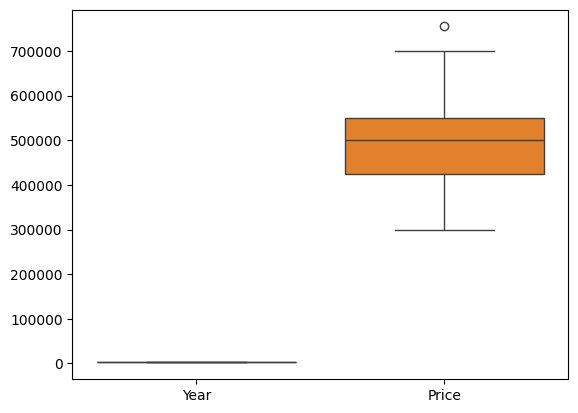

In [24]:
sns.boxplot(data_car)

In [25]:
z_scores=zscore(data_car.Price)
threshold=2.5
outlier=data_car[(z_scores > threshold)|(z_scores < -threshold)]
outlier

,Year,Price
1,2019,755000


In [26]:
# only one outlier value we can either choose to drop or not
# removing outlier value
data_car.drop(outlier.index,inplace=True)
data_car

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


<Axes: >

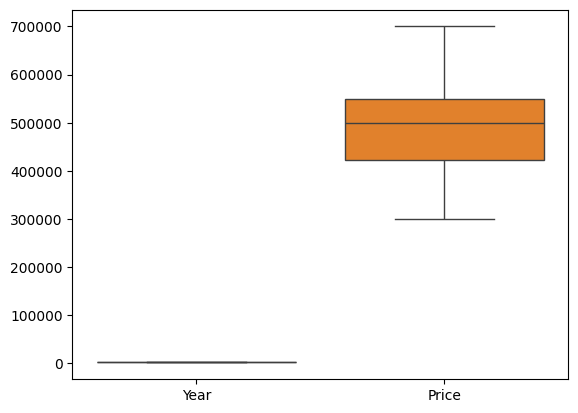

In [27]:
# box plot after removing outlier value
sns.boxplot(data_car)

Checking correaltion by plotting heat map

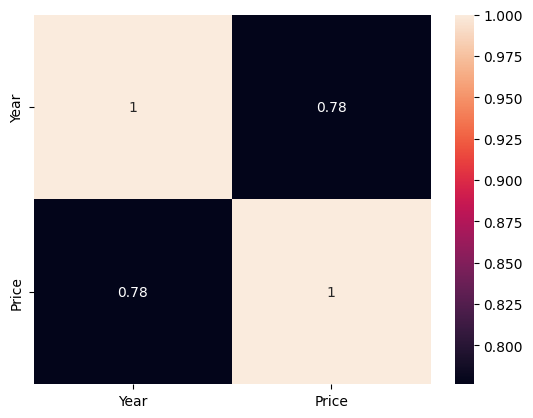

In [30]:
sns.heatmap(data_car.corr(),annot=True)
plt.show()

#Linear Regression

In [31]:
X=data_car.Year.values.reshape(-1,1)
y=data_car.Price.values.reshape(-1,1)

In [32]:
# split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.1)

# create linear regression model
lin_reg=linear_model.LinearRegression()

# fit model to traning data
lin_model=lin_reg.fit(X_train,y_train)

In [ ]:
#make prediction on the test data

In [33]:
y_pred=lin_model.predict(X_test)

In [34]:
# mean squared root of the model
mse_linear=mean_squared_error(y_test,y_pred)
mse_linear

3338906493.509718

In [37]:
# R squared error
r2_linear=r2_score(y_test,y_pred)
r2_linear

0.6496821180237167

Linear regression MSE and R squared error

In [45]:
print("Linear regression MSE : ",mse_linear)
print("R squared error        : ",r2_linear)

Linear regression MSE :  3338906493.509718
R squared error        :  0.6496821180237167


predict the possible price of a 2022 model second-hand grand i10

In [40]:
X_2022=pd.DataFrame({'Year':[2022]}).values.reshape(-1,1)

In [41]:
y_pred=lin_model.predict(X_2022)
y_pred

array([[703683.55915196]])

#The possible price of second hand hyndai gransi10 2022 model is 703683.55

#Lasso regression

In [44]:
# Create Lasso regression model
lasso=linear_model.Lasso(alpha=1)

#fit the model to traning data
lasso_model=lasso.fit(X_train,y_train)

# Make predictions on the test data
y_pred=lasso_model.predict(X_test)

In [46]:
# mean squared error of the model
mse_lasso=mean_squared_error(y_test,y_pred)
mse_lasso

3338929332.0418153

In [48]:
# R squared error of the  model
r2_lasso=r2_score(y_test,y_pred)
r2_lasso

0.6496797218062104

Lasso regression MSE and R squared error

In [49]:
print("Lasso regression MSE   : ",mse_lasso)
print("R squared error        : ",r2_lasso)

Lasso regression MSE   :  3338929332.0418153
R squared error        :  0.6496797218062104


# Lasso regression performing better than Linear regression with a slight difference